#                                    Netflix Data: Cleaning, Analysis and Visualization

#### Importing required libraries.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Dataset.

In [5]:
df = pd.read_csv(r"D:\Unified Mentor\netflix1.csv")
df.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


In [6]:
df.shape

(8790, 10)

In [7]:
# Following dataset have 8790 rows and 10 columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [9]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [10]:
# checked data type of each column.

In [11]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [12]:
# following dataset doesn't have any null values.

In [13]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [14]:
# changed the data format of the column ['date_added'].

In [15]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### EXPLORATORY DATA ANALYSIS

In [16]:
count = df['type'].value_counts()
count

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [17]:
# here Movie has count of 6126 and TV Show has count of 2664.

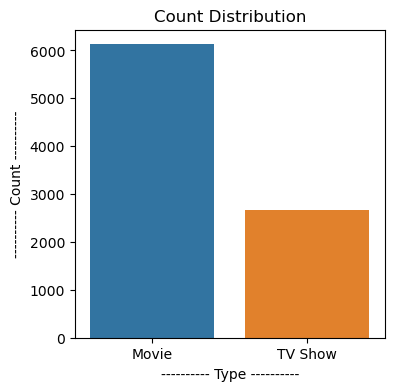

([<matplotlib.patches.Wedge at 0x232ae1c01d0>,
 [Text(-0.6379461266276708, 0.8961164765368127, 'Movie'),
  Text(0.6379461266276707, -0.8961164765368128, 'TV Show')],
 [Text(-0.34797061452418404, 0.48879080538371594, '70%'),
  Text(0.347970614524184, -0.488790805383716, '30%')])

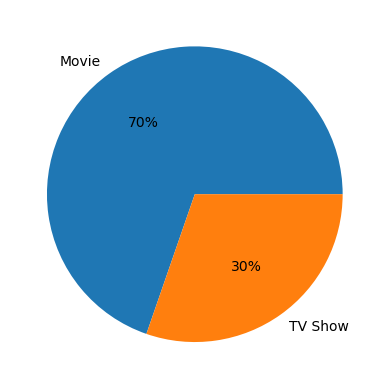

In [18]:
plt.figure(figsize=(4,4))
sns.barplot(x=count.index,y=count.values)
plt.title('Count Distribution')
plt.xlabel('---------- Type ----------')
plt.ylabel('---------- Count ----------')
plt.show()

plt.pie(count, labels=['Movie', 'TV Show'], autopct='%.0f%%')

In [ ]:
# here we have shown the count of Movie and TV Show through Bar graph and Pie chart.

In [17]:
top_directors = df['director'].value_counts()
top_directors

director
Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: count, Length: 4528, dtype: int64

In [18]:
top_directors = df.groupby('director')['title'].nunique().sort_values(ascending=False).reset_index()
top_directors

,director,title
0,Not Given,2587
1,Rajiv Chilaka,20
2,Alastair Fothergill,18
3,"Raúl Campos, Jan Suter",18
4,Suhas Kadav,16
...,...,...
4523,Jose Gomez,1
4524,Jose Javier Reyes,1
4525,"Joseduardo Giordano, Sergio Goyri Jr.",1
4526,Josef Fares,1


In [ ]:
# here 'Rajiv Chilaka' is the TOP director who's having 20 titles.

In [19]:
genre_count = df['listed_in'].value_counts(ascending=False).reset_index()
genre_count

,listed_in,count
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
...,...,...
508,Anime Features,1
509,"Action & Adventure, Horror Movies, Independent...",1
510,"Action & Adventure, Classic Movies, Internatio...",1
511,"Cult Movies, Independent Movies, Thrillers",1


In [22]:
df.groupby('type')['release_year'].min()

type
Movie      1942
TV Show    1925
Name: release_year, dtype: int64

In [21]:
df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [ ]:
# Count of 'RATING' on Netflix.

In [44]:
df['rating'] = df['rating'].astype(str)

In [45]:
count = df['rating'].value_counts().reset_index().sort_values('count',ascending=False)
count

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


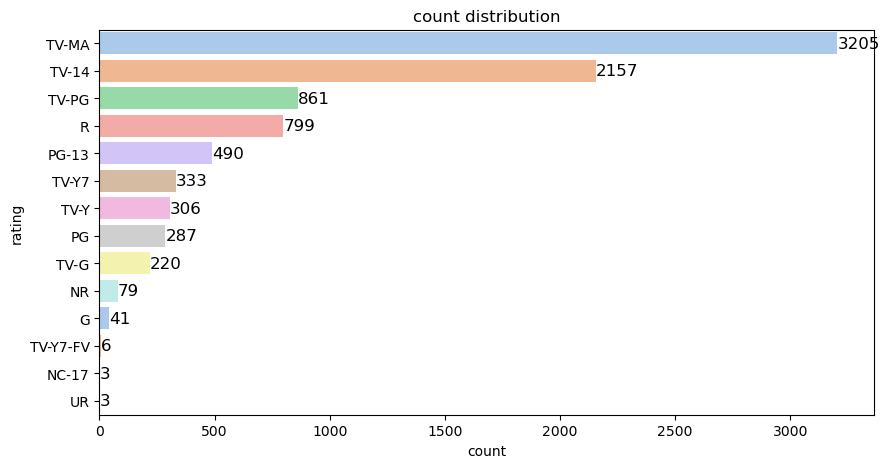

In [51]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='count', y='rating', data=count, palette='pastel')

for bar in ax.containers:
    ax.bar_label(bar, fontsize=12)

plt.xlabel('count')
plt.ylabel('rating')
plt.title('count distribution')
plt.show()

In [ ]:
# 'Rating' Count using Bar Plot.

In [23]:
df['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

In [27]:
top_ten_countries = df['country'].value_counts().reset_index().sort_values('count',ascending=False)[:10]
top_ten_countries

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


In [ ]:
# Here are the Top 10 Countries.

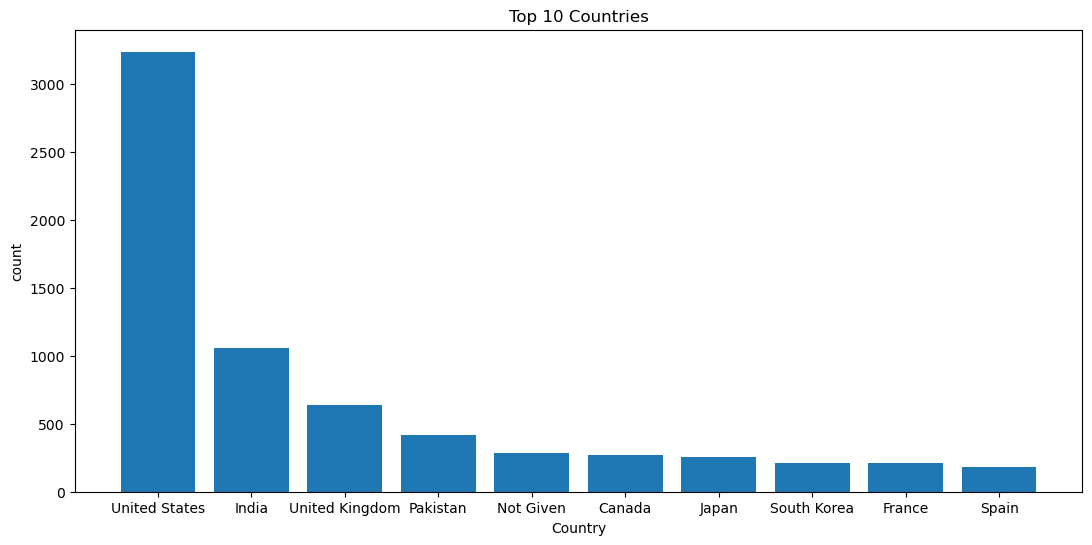

In [37]:
plt.figure(figsize=(13,6))
plt.bar(top_ten_countries['country'],top_ten_countries['count'])
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()

In [ ]:
# 'Top 10 Countries' count distribution using Bar Plot.

In [52]:
top_10_release_year = df['release_year'].value_counts().head(10)
top_10_release_year

release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
Name: count, dtype: int64

In [ ]:
# Year '2018' has highest release count of '1146'

In [42]:
df['release_year'].value_counts().tail(10)

release_year
1954    2
1965    2
1964    2
1946    2
1942    2
1966    1
1959    1
1925    1
1947    1
1961    1
Name: count, dtype: int64

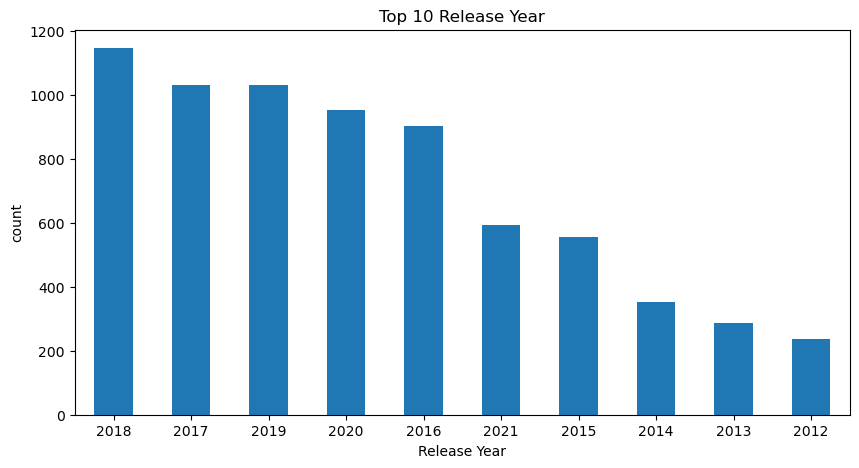

In [58]:
top_10_release_year.plot(kind='bar',figsize=(10,5))
plt.title('Top 10 Release Year')
plt.xlabel('Release Year')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

In [68]:
df['year']=df['date_added'].dt.year
df['month']=df['date_added'].dt.month
df['day']=df['date_added'].dt.day

In [72]:
df.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year,month,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,24
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,22
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",2021,9,24
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",2021,9,24
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",2021,5,1
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",2021,9,23
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,2021-05-01,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals",2021,5,1


#### Monthly releases of Movies and TV shows on Netflix

In [74]:
monthly_movie_release=df[df['type']=='Movie']['month'].value_counts().sort_index()
monthly_movie_release

month
1     545
2     382
3     528
4     549
5     439
6     492
7     565
8     518
9     518
10    545
11    498
12    547
Name: count, dtype: int64

In [69]:
monthly_series_release=df[df['type']=='TV Show']['month'].value_counts().sort_index()
monthly_series_release

month
1     192
2     180
3     213
4     214
5     193
6     236
7     262
8     236
9     251
10    215
11    207
12    265
Name: count, dtype: int64

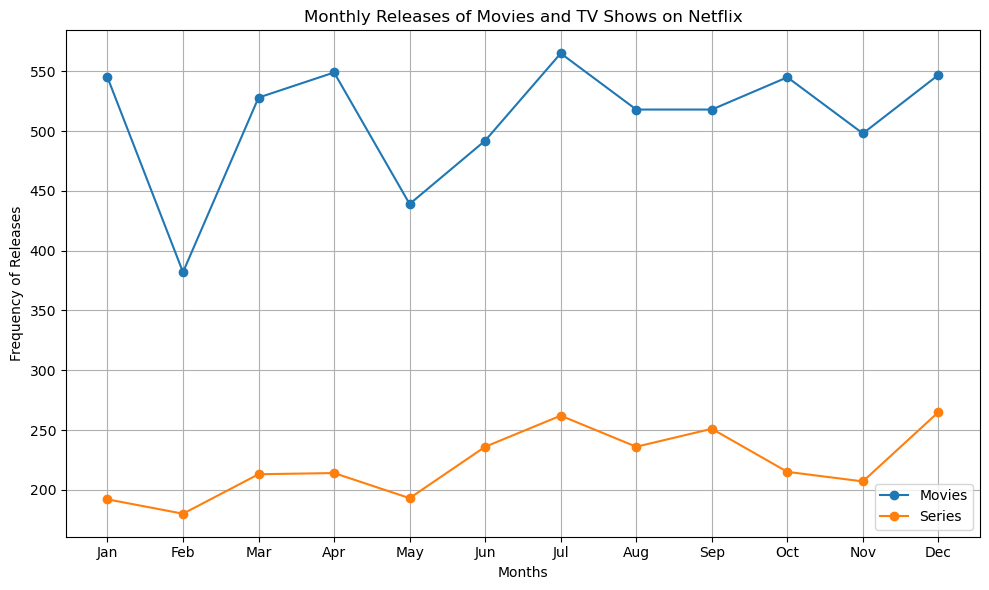

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies', marker='o')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series', marker='o')
plt.xlabel("Months")
plt.ylabel("Frequency of Releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Monthly Releases of Movies and TV Shows on Netflix")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# here we plot the montly released movies and tv shows using bar plot.

#### Yearly releases of Movies and TV Shows on Netflix

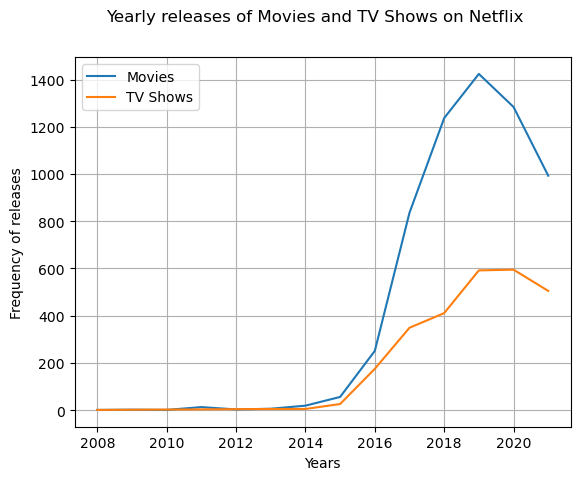

In [77]:
yearly_movie_releases=df[df['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=df[df['type']=='TV Show']['year'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index,yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index,yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

In [ ]:
# here we plot the yearly released movies and tv shows using bar plot.

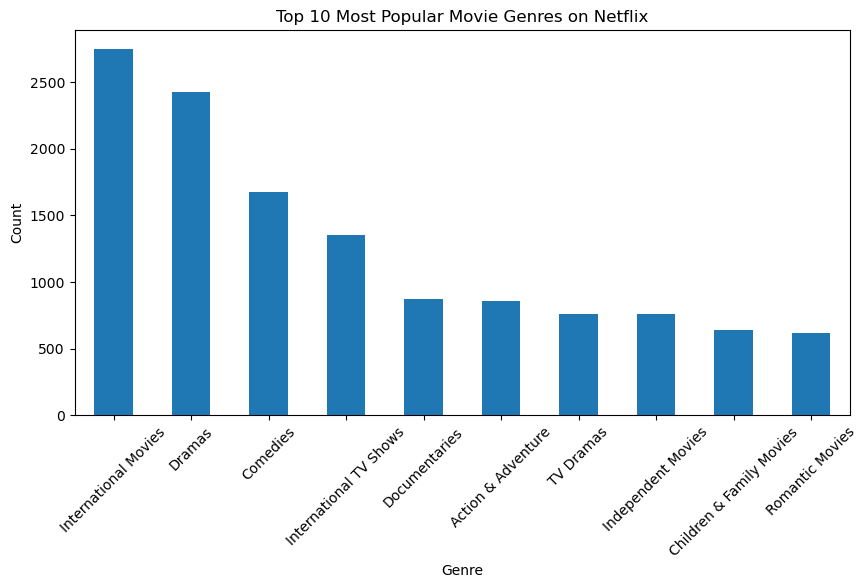

In [80]:
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)
top_genres.plot(kind='bar', figsize=(10,5))
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 10 Most Popular Movie Genres on Netflix")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# here we plot the top 10 movie genres.

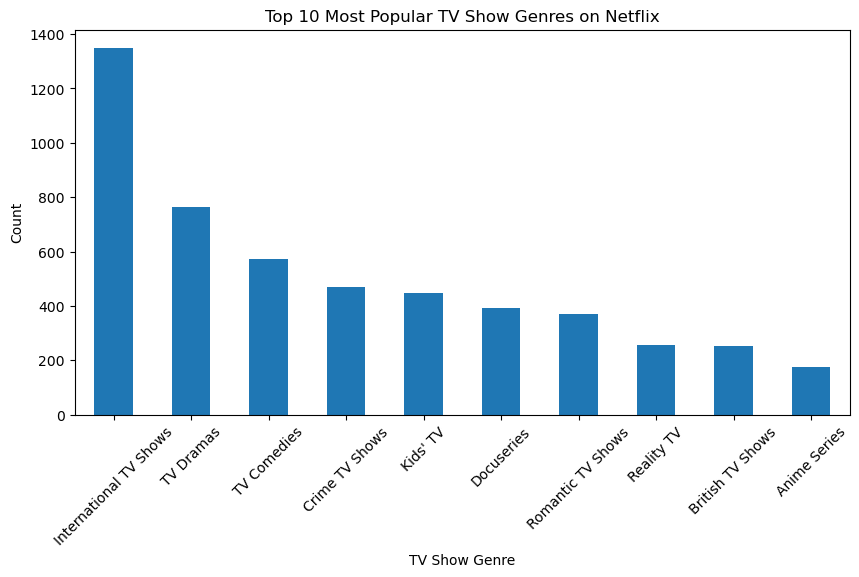

In [81]:
tv_shows = df[df['type'] == 'TV Show']
top_tv_genres = tv_shows['listed_in'].str.split(', ').explode().value_counts().head(10)
top_tv_genres.plot(kind='bar', figsize=(10,5))
plt.xlabel("TV Show Genre")
plt.ylabel("Count")
plt.title("Top 10 Most Popular TV Show Genres on Netflix")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# here we plot the top 10 tv show genres.

Based on my analysis and visualizations, here are the key insights derived from the Netflix dataset:

1️⃣ Top Directors:
We identified the most frequent directors in Netflix’s catalog.
This helps understand which filmmakers have the most content on the platform.

2️⃣ Ratings Distribution:
The majority of content falls under a few common rating categories.
This helps in understanding the type of audience Netflix primarily targets.

3️⃣ Top 10 Release Years:
Certain years have a significantly higher number of releases.
This could indicate years when Netflix expanded its content library aggressively.

4️⃣ Top Movie Genres:
The most common movie genres show what type of content is in high demand.
This can provide insights into Netflix’s strategy for attracting viewers.

5️⃣ Top TV Show Genres:
Popular TV show genres help in understanding binge-worthy content trends.
Netflix focuses on specific genres that are well-received by audiences.